<a href="https://colab.research.google.com/github/liadmagen/MedicalImageProcessingCourse/blob/main/medImgproc_00_working_with_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we'll explore how images are represented by the computer. We'll learn how to load, examine and manipulate images, and to perform basic pre-processing actions.

# Basic Operations and Image Examination

We start by loading the packages.
We will use:

*    **matplotlib** - a package for plotting graphs and images  
*    **numpy** - a package for numerical processing of matrices, and
*    **scikit-learn image** - a package for processing scientific images, which also includes scientific images examples.

In [35]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np


from skimage import data

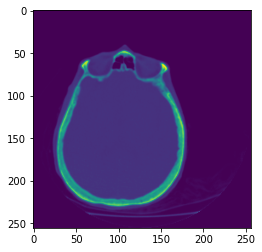

In [39]:
# skimage.data has many different image samples. Check them out here: https://scikit-image.org/docs/stable/api/skimage.data.html
# You can play with this notebook, by changing the data image to other images and examin the result.
img = data.brain()[0]
plt.imshow(img)

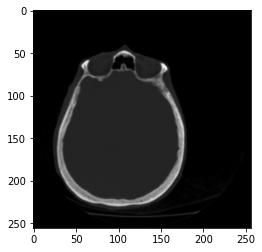

In [40]:
# we can also plot it in black & white by setting the colormap (cmap)
plt.imshow(img, cmap=plt.cm.gray)

In [44]:
# The shape of the matrix is the width and height in Pixels
print(img.shape)
img_width, img_height = img.shape

(256, 256)


In [4]:
# We can print the matrix itself:
img

array([[4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       ...,
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4],
       [4, 4, 4, ..., 4, 4, 4]], dtype=uint16)

In [5]:
# or see and use parts of it using python slices
img[100:120, 50:58]

array([[19044, 16900, 13456,  9604,  7744,  7225,  6889,  7056],
       [18496, 15625, 10816,  7921,  7569,  7225,  7056,  6889],
       [17424, 15376, 11025,  8100,  7396,  7225,  7396,  7056],
       [17161, 15129, 11449,  8464,  7225,  7056,  7225,  7225],
       [17689, 15129, 10609,  7921,  7056,  6889,  6889,  7225],
       [17956, 14161,  9409,  7396,  7056,  6889,  6889,  7225],
       [17689, 12321,  8100,  7225,  7056,  7056,  7056,  7056],
       [18496, 11025,  7569,  7056,  7056,  6889,  7225,  7056],
       [18769, 10201,  7225,  7056,  6889,  6889,  7056,  7056],
       [18225,  9604,  7225,  7056,  7056,  6889,  6724,  6889],
       [15625,  8649,  7056,  7056,  7056,  6889,  6889,  7056],
       [12321,  7921,  6889,  6889,  6724,  6724,  7056,  7056],
       [ 9801,  7396,  6889,  6889,  6561,  6724,  6889,  6889],
       [ 7921,  7056,  6724,  6889,  6724,  6724,  6889,  6889],
       [ 7225,  7056,  6889,  6889,  6889,  6724,  6724,  6889],
       [ 7225,  6889,  70

In [45]:
# the values of the matrix corresponds to the color value of the pixel at that point
print(img.max())
print(img.min())

49284
0


## Histogram
A histogram is sort of a graph or plot, which can give you an overall idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, though not always) in X-axis and corresponding number of pixels in the image on Y-axis.



In [46]:
# Let's get the histogram using numpy:
hist, bins = np.histogram(img, bins=range(img.max()), range=[0, img.max()])
hist

array([ 595, 3208,    0, ...,    0,    0,    0])

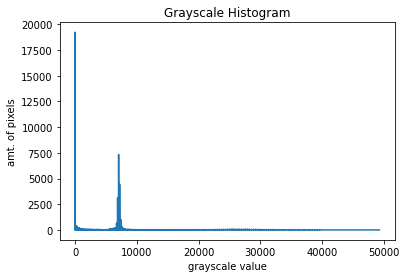

In [16]:
# And plot it using matplotlib
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("amt. of pixels")

plt.plot(hist) 
plt.show()

Another way to think or imagine of the color values is as a 3D surface map: black (or 0) is a low valley, while brighter colors (up to white) are mountains:

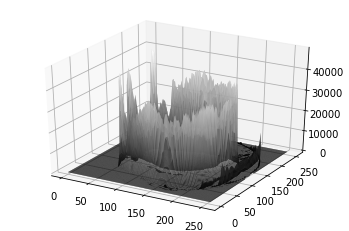

In [ ]:
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_width, 0:img_height]

# create the figure
fig = plt.figure()

# gca = Get the Current Axes (or create new if)
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img ,rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)

# show it
plt.show()


# Image Processing

Image processing is done thorugh a function that takes one or more images as an input and produces an output image.

Image transforms are generally divided to two:
* Point operators: Operators that transform pixels values individually. For example, changing the brightness, adjusting contrast or correcting the image colors.
* Neighborhood (area-based) operators - transform a pixel based on its neighbor pixels


## Pixel Operations
Since images are represented as 2D matrices, we can manupulate or generate images by "turning on or off" pixels in the image.

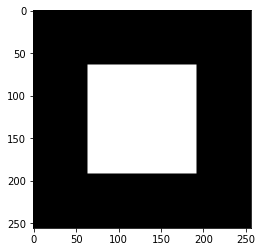

In [49]:
img_width, img_height = img.shape

mask = np.zeros(img.shape[:2], np.uint8)
mask_width, mask_height = img_width//4, img_height//4
mask[mask_width:img_width-mask_width, mask_height:img_height-mask_height] = img.max()
plt.imshow(mask, cmap='gray')

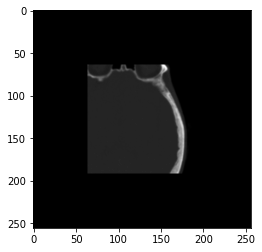

In [51]:
# And we can fuse two images together with byte operations. For example, AND operator would result in '0's where either the mask or the image was black (0).
masked_img = cv.bitwise_and(img,img,mask = mask)
plt.imshow(masked_img, cmap='gray')

###Linear blend operator 
Images can also be blnded linearly, giving more weight to one image over the other. 

$g(x) = (1-\alpha) f_0(x) + \alpha f_1(x)$

By varying α from 0→1 this operator can be used to perform a temporal cross-dissolve between two images or videos, as seen in slide shows and film productions.

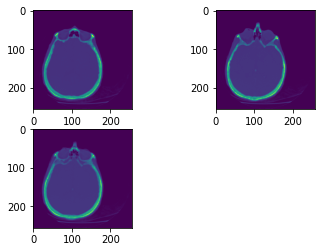

In [58]:
alpha = 0.5
beta = (1.0 - alpha)
img1 = data.brain()[0]
img2 = data.brain()[5]
dst = cv.addWeighted(img1, alpha, img2, beta, 0.0)

plt.figure(1)
plt.subplot(221)
plt.imshow(img1)
plt.subplot(222)
plt.imshow(img2)
plt.subplot(223)
plt.imshow(dst)

## Contrast

### Linear manipulation
Two commonly used point processes are a multiplication by a factor and an addition with a constant:
$g(x) = \alpha f(x) + \beta$

The parameters $alpha>0$ and $\beta$ are often called the **gain** and **bias** parameters; sometimes these parameters are said to control *contrast* and *brightness* respectively.
You can think of $f(x)$ as the source image pixels and $g(x)$ as the output image pixels. Then, more conveniently we can write the expression as:

$g(i,j)=\alpha⋅f(i,j)+\beta$

where $i$ and $j$ indicates that the pixel is located in the $i$-th row and $j$-th column.

CPU times: user 629 µs, sys: 3.05 ms, total: 3.68 ms
Wall time: 3.72 ms


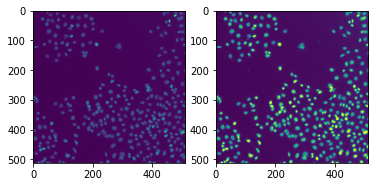

In [118]:
def set_contrast_brightness(img, alpha = 1.0, beta = 0):
  out_img = np.zeros(img.shape, img.dtype)
  ############################## YOUR TURN: ############################## 
  """
  Implement the function g(x)=αf(x)+β with pixel operations and numpy.
  Try implementing it first using two loops, for the rows and columns.
  Then, see how you can use Numpy function for matrix operations. 
  Which method was faster?

  Attention: pixels color values must be integers, and in the range of 0 to 255.
  The numpy functions `clip` and `rint` might be useful.
  """
  out_img = np.clip(np.rint(alpha * img + beta), 0, 255)
  return out_img


alpha = 2.2  # Simple contrast control
beta = 50.    # Simple brightness control

orig_img = data.human_mitosis()
%time new_img = set_contrast_brightness(orig_img, alpha, beta)


plt.figure(1)
plt.subplot(121)
plt.imshow(orig_img)
plt.subplot(122)
plt.imshow(new_img)
plt.show()

In [ ]:
################################# YOUR TURN: ################################# 
### Plot the histogram of the original and the altered human_mitosis image ###





##############################################################################

In [120]:
# The OpenCV package has implemented such method - convertScaleAbs. 
# Ensure your method operates correctly:

alpha, beta = 2.0, 50
assert (cv.convertScaleAbs(orig_img, alpha=alpha, beta=beta) == set_contrast_brightness(orig_img, alpha, beta)).all()

alpha, beta = 1.0, 0
assert (cv.convertScaleAbs(orig_img, alpha=alpha, beta=beta) == set_contrast_brightness(orig_img, alpha, beta)).all()

alpha, beta = 3.0, 250
assert (cv.convertScaleAbs(orig_img, alpha=alpha, beta=beta) == set_contrast_brightness(orig_img, alpha, beta)).all()

### Gamma Correction
Gamma Correction can be used to correct the brightness of an image by using a **non linear** transformation between the input values and the mapped output values using this function:

\begin{align}
        O = \left ( \frac{I}{255} \right ) ^\gamma × 255
    \end{align}


As this relation is non linear, the effect will not be the same for all the pixels and will depend to their original value.

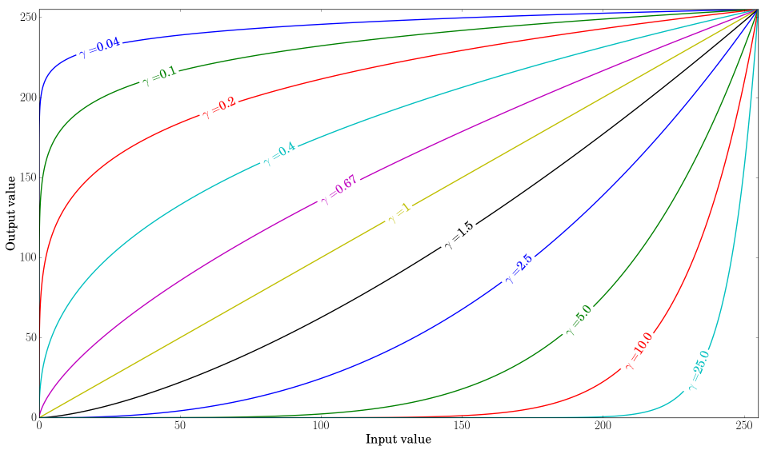


When $γ<1$, the original dark regions will be brighter and the histogram will be shifted to the right whereas it will be the opposite with $γ>1$.


Let's see it in action:


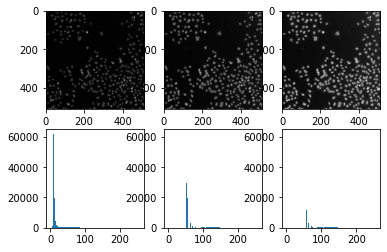

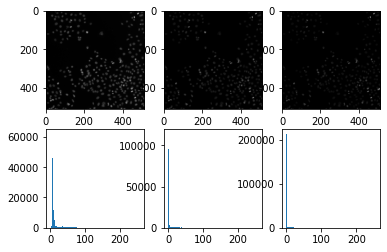

In [140]:
def gamma(img, gamma=1.0):
  return np.clip(pow(img / 255.0, gamma) * 255.0, 0, 255)

def plot_rgb_hist(img):
    histr = cv.calcHist([img],[0],None,[256],[0,256])
    plt.plot(histr)
    plt.xlim([0,256])

orig_img = data.human_mitosis()

plt.figure(1)
plt.subplot(231)
plt.imshow(orig_img, cmap='gray')
plt.subplot(232)
plt.imshow(gamma(orig_img, 0.5), cmap='gray')
plt.subplot(233)
plt.imshow(gamma(orig_img, 0.1), cmap='gray')

plt.subplot(234)
plt.hist(orig_img.ravel(),256,[0,256]); 
plt.subplot(235)
plt.hist(gamma(orig_img, 0.5).ravel(),256,[0,256]); 
plt.subplot(236)
plt.hist(gamma(orig_img, 0.5).ravel(),256,[0,256]); 

plt.figure(2)
plt.subplot(231)
plt.imshow(gamma(orig_img, 1.1), cmap='gray')
plt.subplot(232)
plt.imshow(gamma(orig_img, 1.7), cmap='gray')
plt.subplot(233)
plt.imshow(gamma(orig_img, 2.0), cmap='gray')
plt.subplot(234)
plt.hist(gamma(orig_img, 1.1).ravel(),256,[0,256]); 
plt.subplot(235)
plt.hist(gamma(orig_img, 1.7).ravel(),256,[0,256]); 
plt.subplot(236)
plt.hist(gamma(orig_img, 2.0).ravel(),256,[0,256]); 

plt.show()

### Contrast Stretching

As we've seen before, contrast Enhancement methods can be divided into Linear and Non-Linear ones. Contrast Stretching belongs to the **Linear** family. Other non-linear methods to adjust the contrast automatically includes [Histogram Equilisation](https://en.wikipedia.org/wiki/Histogram_equalization) and [Gaussian Stretch](https://www.l3harrisgeospatial.com/docs/backgroundstretchtypes.html). 

Contrast enhancement is represented well in the following image:

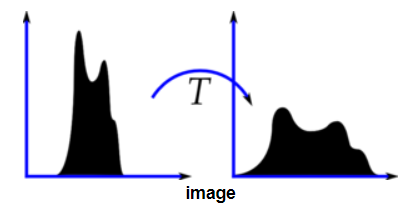

Contrast stretching as the name suggests is an image enhancement technique that tries to improve the contrast by stretching the intensity values of an image to fill the entire dynamic range. The transformation function used is always linear and monotonically increasing.

A typical transformation function for contrast stretching looks something like this:
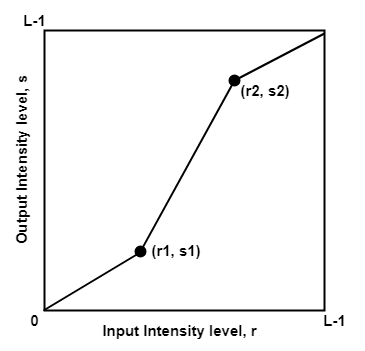

By changing the location of points (r1, s1) and (r2, s2), we can control the shape of the transformation function. For example,

* When $r1 =s1$ and $r2=s2$, transformation is a **Linear** function.
* When $r1=r2$, $s1=0$ and $s2=L-1$, transformation becomes a **thresholding** function.
* When $(r1, s1) = (rmin, 0)$ and $(r2, s2) = (rmax, L-1)$, this is known as **Min-Max** Stretching.
* When $(r1, s1) = (rmin + c, 0)$ and $(r2, s2) = (rmax – c, L-1)$, this is known as **Percentile** Stretching.

Let’s understand Min-Max and Percentile Stretching in detail.

The general formula for Contrast Stretching is 
\begin{align}
        S = (r - r_{min}) \left ( \frac{C_{max} - C_{min}}{r_{max} - r_{min}} \right ) + C_{min}
    \end{align}

Where $C_{max}$ and $C_{min}$ are the maxmimum and minimum **possible** color values (normally 255 and 0) and the $r_{max}$ and $r_{min}$ are the maximal and minimal color values that appear in the image itself.

For the normal scale of colors (0 - 255) the formula can be simplified to:
\begin{align}
        S = 255 \times \left ( \frac{r - r_{min}}{r_{max} - r_{min}} \right ) + C_{min}
    \end{align}

This method is also known as a **linear scaling** or **normalization** method, and is also widely used in Machine Learning for any other sort of data (e.g. tabular).

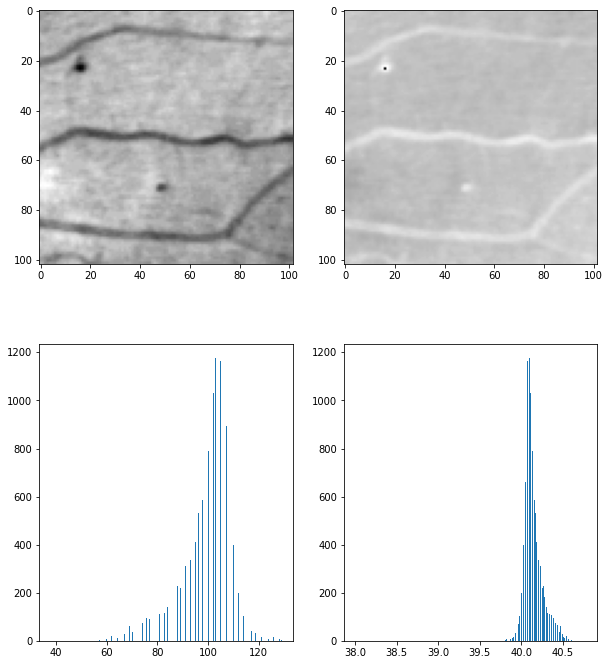

In [203]:
def contrast_stretch(img):
  new_img = np.zeros(img.shape, img.dtype)
  ### YOUR TURN ###
  ### Implement the contrast stretching method



  ### ENd ###

  return new_img

orig_img = data.microaneurysms()
streched_img = contrast_stretch(orig_img)

plt.figure(1, figsize=[10,12])
plt.subplot(221)
plt.imshow(orig_img, cmap='gray')
plt.subplot(222)
plt.imshow(streched_img, cmap='gray')

plt.subplot(223)
plt.hist(orig_img.ravel(),256); 
plt.subplot(224)
plt.hist(streched_img.ravel(),256); 
